# **Modelagem e Simulação do Mundo Físico: Projeto 3**

##### Francisco Janela | Nicolas Queiroga | Rafael Niccherri | Rodrigo Griner - 1C

## Foguete de garrafa PET:

Em uma feira de ciências, uma escola decide competir num lançamento de foguetes de garrafa PET. Com a intenção de ajudá-los, nosso projeto será baseado nisso.

Para o projeto, decidimos modelar as equações que regem o lançamento de um foguete de garrafa PET, considerando a força e ângulo de lançamento, resistência do ar e massa variável.


<left><img src="Modelo_Foguete.png" width=500 style="float: center; margin: 0px 0px 10px 10px"></left>
<left><b>Figura 1: Modelo desenhado de um Foguete de garrafa PET</b></left>


#### Perguntas:

- **Pergunta 1**: Como o ângulo de lançamento do foguete influencia o alcance? 

- **Pergunta 2**: Como a massa de água (“combustível”) influencia o alcance?

- **Pergunta 3**: Como a massa do bico do foguete influencia o alcance?


#### (0.1) Importando bibliotecas e definindo parâmetros

Para este modelo vamos usar como parâmetros:


In [1]:
## Importando Bibliotecas para o nosso Projeto:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math

%matplotlib inline
from ipywidgets import interactive

## Parâmetros e Variáveis
# gravidade -> m/s2:
g = 9.81
# densidade da água -> kg/m3:
dw = 997
# densidade do ar -> kg/m3
dar = 1.27
# raio do bico da garrafa -> m:
rn = 0.01
#raio da garrafa -> m:
rg = 0.055
# massa seca -> kg
mS = 0.3
# massa de água para propulsão -> kg:
mP = 0.66
# massa inicial do foguete -> kg:
M = mS + mP
# pressão inicial -> pascal:
p0 = 517107
# pressão atmosférica -> pascal:
pout = 101325
# compartimento de propulsão - garrafa PET de 2L -> m3:
V = 0.002
# volume inicial de ar -> m3:
V0 = 0.002-(mP/dw)
# coeficiente adiabático:
gama = 1.4
# coeficiente de arrasto:
Ca = 0.9
# Área de secção transversal -> m2:
A = (math.pi*rg**2)

#### (0.2) Condições inicias e lista de tempo

Definindo para o modelo as condições iniciais e a lista tempo (por meio do numpy):

In [2]:
# condições iniciais:
x0=0
y0=0
vx0=0
vy0=0
m0 = M
X_0=[x0,y0,vx0,vy0,m0]

# lista de tempo utilizada:
dt=1e-5
lista_tempo = np.arange(0,10,dt)

### (1) 1ª Iteração do modelo

Para a primeira iteração desenvolvemos o modelo desconsiderando a resistência do ar.

<left><img src="DCL_1iteracao.png" width=500 style="float: center; margin: 0px 0px 10px 10px"></left>
<left><b>Figura 2: Diagrama do corpo livre da 1ª Iteração</b></left>

<left><img src="Legenda_1iteracao.png" width=500 style="float: center; margin: 0px 0px 10px 10px"></left>
<left><b>Figura 3: Legenda do diagrama</b></left>

Para implementar com ODEINT, as duas derivadas de 2ª ordem que variam o x e o y do foguete foram transformadas em 4 de 1ª ordem, resultando nas seguintes equações do sistema:

$\frac{dx}{dt}=v_x$

$\frac{dy}{dt}=v_y$

$\frac{dvx}{dt}=\frac{1}{m}\cdot[\pi\cdot r_n^2 \cdot d_w \cdot v_e^2 \cdot cos \theta]$

$\frac{dvy}{dt}=\frac{1}{m}\cdot[\pi\cdot r_n^2 \cdot d_w \cdot v_e^2 \cdot sen \theta - m \cdot g]$

$\frac{dm}{dt}=-\pi \cdot r_n^2 \cdot d_w \cdot v_e$


#### (1.1) 1º Modelo:

In [3]:
def modelo1 (X,t,teta):
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
    m = X[4]
    
    # velocidade:
    v = math.sqrt(vx**2+vy**2)
    
    # definindo os senos e cossenos do modelo
    if v>0:
        sen_t = vy/v
        cos_t = vx/v
    else:
        sen_t = math.sin(teta)
        cos_t = math.cos(teta)
    
    # variando a pressão interna de ar:
    pin = p0*((V0+(M-m)/dw)/V0)**(-gama)
    # velocidade de escape do líquido:
    ve = math.sqrt((2*(pin-pout))/dw)
    # Thrust:
    T = (math.pi*(rn**2)*dw*(ve**2))

    #---------- derivadas do modelo ---------
    if y >= 0:
        # enquanto houver combustível para Thrust:
        if (m > mS):
            dxdt = vx
            dydt = vy
            dvxdt = (T*cos_t)/m
            dvydt = (T*sen_t-m*g)/m
            dmdt = -math.pi*(rn**2)*dw*ve
        # quando acabar:
        else:
            dxdt = vx
            dydt = vy
            dvxdt = 0
            dvydt = -g
            dmdt = 0
    else:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0
        dmdt = 0
        
    # formando a lista com todas as variações
    dXdt = [dxdt,dydt,dvxdt,dvydt,dmdt]
    return dXdt
    

#### (1.2) Aplicando ODEINT e plotando os gráficos

Para aplicar a função ODEINT e plotar os gráficos com a barra interativa usamos a biblioteca 'ipywidgets'. Basta variar a barra que o angulo de lançamento varia para visualização.

In [4]:
def funcao_interactive(teta):
    # passando graus para radianos:
    teta = math.radians(teta)
    
    #---------- rodando ODEINT -----------
    X = odeint(modelo1,X_0,lista_tempo,args=(teta,))
    lista_x = X[:,0]
    lista_y = X[:,1]
    lista_vx = X[:,2]
    lista_vy = X[:,3]
    
    #-------- plotando o gráfico ---------
    plt.plot(lista_x, lista_y, label='Sem resistência do ar')
    plt.title('Gráfico de y(t) por x(t)')
    plt.ylabel('y(t)')
    plt.xlabel('x(t)')
    plt.xticks([-10,0,10,20,30,40,50,60,70,80])
    plt.yticks([0,5,10,15,20,25,30])
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
    

interactive_plot = interactive(funcao_interactive,teta=(40,90,5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=65, description='teta', max=90, min=40, step=5), Output(layout=Layout(he…

### (2) 2ª Iteração do modelo

Para a segunda iterção foi considerada a resistência do ar:

<left><img src="DCL_2iteracao.png" width=500 style="float: center; margin: 0px 0px 10px 10px"></left>
<left><b>Figura 4: Diagrama do corpo livre da 2ª Iteração</b></left>

<left><img src="Legenda_2iteracao.png" width=500 style="float: center; margin: 0px 0px 10px 10px"></left>
<left><b>Figura 5: Legenda do diagrama</b></left>

As equações para o ODEINT são:

$\frac{dx}{dt}=v_x$

$\frac{dy}{dt}=v_y$

$\frac{dvx}{dt}=\frac{1}{m}\cdot[\pi\cdot r_n^2 \cdot d_w \cdot v_e^2 \cdot cos \theta - \frac{1}{2}\cdot d_ar \cdot v^2 \cdot C_d \cdot A \cdot cos\theta]$

$\frac{dvy}{dt}=\frac{1}{m}\cdot[\pi\cdot r_n^2 \cdot d_w \cdot v_e^2 \cdot sen \theta - \frac{1}{2}\cdot d_ar \cdot v^2 \cdot C_d \cdot A \cdot sen\theta - m \cdot g]$

$\frac{dm}{dt}=-\pi \cdot r_n^2 \cdot d_w \cdot v_e$

#### (2.1) 2º Modelo:

In [5]:
def modelo2 (X,t,teta):
    x = X[0]
    y = X[1]
    vx = X[2]
    vy = X[3]
    m = X[4]
    
    # velocidade:
    v = math.sqrt(vx**2+vy**2)
    
    # definindo os senos e cossenos do modelo
    if v>0:
        sen_t = vy/v
        cos_t = vx/v
    else:
        sen_t = math.sin(teta)
        cos_t = math.cos(teta)
    
    # variando a pressão interna de ar:
    pin = p0*((V0+(M-m)/dw)/V0)**(-gama)
    # velocidade de escape do líquido:
    ve = math.sqrt((2*(pin-pout))/dw)
    # Thrust:
    T = (math.pi*(rn**2)*dw*(ve**2))
    
    # Forças de resistência do ar em x e y
    Frarx = 0.5*Ca*dar*A*vx*v
    Frary = 0.5*Ca*dar*A*vy*v

    #---------- derivadas do modelo ---------
    if y >= 0:
        if (m > mS):
            dxdt = vx
            dydt = vy
            dvxdt = (T*cos_t-Frarx)/m
            dvydt = (T*sen_t-Frary-m*g)/m
            dmdt = -math.pi*(rn**2)*dw*ve
        else:
            dxdt = vx
            dydt = vy
            dvxdt = -Frarx/m
            dvydt = (-Frary-m*g)/m
            dmdt = 0
    else:
        dxdt = 0
        dydt = 0
        dvxdt = 0
        dvydt = 0
        dmdt = 0
    dXdt = [dxdt,dydt,dvxdt,dvydt,dmdt]
    return dXdt
    

#### (2.2) Aplicando ODEINT e plotando os gráficos

Da mesma forma que na primeira iteração, temos a barra interativa para variar o ângulo de lançamento

In [6]:
def funcao_interactive_2(angulo):
    # de graus para radianos:
    teta = math.radians(angulo)
    
    #---------- rodando ODEINT -----------
    X2 = odeint(modelo2,X_0,lista_tempo,args=(teta,))
    lista_x2 = X2[:,0]
    lista_y2 = X2[:,1]
    lista_vx2 = X2[:,2]
    lista_vy2 = X2[:,3]
    
    #-------- plotando o gráfico ---------
    plt.plot(lista_x2, lista_y2, 'r', label='Com resistência do ar')
    plt.title('Gráfico de y(t) por x(t)')
    plt.ylabel('y(t)')
    plt.xlabel('x(t)')
    plt.xticks([-10,0,10,20,30,40,50])
    plt.yticks([0,5,10,15,20,25,30])
    plt.legend()
    plt.grid(True)
    plt.show()
    

interactive_plot = interactive(funcao_interactive_2,angulo=(40,90,5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=65, description='angulo', max=90, min=40, step=5), Output(layout=Layout(…

### (3) Validação do modelo

A partir de um experimentro já feito de lançamento vertical, e utilizando seus parâmetros de lançamento, validamos o modelo. 

Utilizamos somente os pontos de subida, uma vez que a descida é feita com um paraquedas.

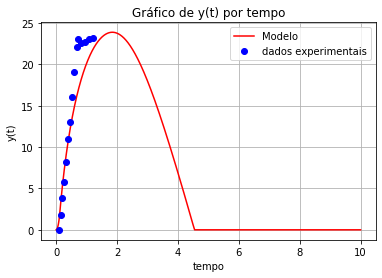

In [7]:
#--------- validando o modelo com o lançamento em y ---------
# condições iniciais do lançamento experimental:
p0 = 482633
mP = 0.8
mS = 0.1
M = mS + mP

#condições iniciais:
x0=0
y0=0
vx0=0
vy0=0
m0 = M
X_0=[x0,y0,vx0,vy0,m0]

# lista de tempo e posição em y:
lista_tempoMedido = [0.107421875,0.15625,0.1953125,0.25390625,0.322265625,0.390625,0.44921875,0.52734375,0.595703125,0.673828125,0.732421875,0.810546875,0.947265625,1.07421875,1.220703125]# abertura do paraquedas : [1.46484375,1.767578125,2.03125,2.24609375,2.421875,2.65625,2.822265625,2.978515625,3.125,3.349609375,3.603515625,3.76953125,3.9453125,4.111328125,4.2578125,4.39453125,4.541015625,4.66796875,4.765625,4.86328125,4.98046875,5.05859375]
lista_yMedido = [-0.01245503,1.849296346,3.82402476,5.798532731,8.22439775,10.98886322,13.07623801,16.00989348,19.1129594,22.10304829,23.00532149,22.60940586,22.72072958,23.05789715,23.16911064]# abertura do paraquedas : [23.16635511,23.27580506,22.93422863,22.19816944,21.1803841,19.76690357,18.57992822,17.05446265,16.03700797,14.28503721,12.6456026,11.7407943,10.49727532,9.197433162,8.010678259,6.824033578,5.524411858,4.394310807,3.65957428,2.69910412,1.230512839,0.721730389,]

# rodando ODEINT para o lançamento vertival:
teta = math.radians(90)
X2 = odeint(modelo2,X_0,lista_tempo,args=(teta,))
lista_y2 = X2[:,1]

# plotando o gráfico:
plt.plot(lista_tempo, lista_y2, 'r', label='Modelo')
plt.plot(lista_tempoMedido,lista_yMedido,'bo',label='dados experimentais')
plt.title('Gráfico de y(t) por tempo')
plt.ylabel('y(t)')
plt.xlabel('tempo')
plt.yticks([0,5,10,15,20,25])
plt.legend()
plt.grid(True)
plt.show()

### (4) Respondendo às Perguntas:

Com o modelo validado, podemos agora gerar os gráficos para responder às perguntas feitas no início do projeto.

#### (4.1) Alcance em função do ângulo:

Para responder essa pergunta vamos rodar o ODEINT para vários angulos de lançamento e pegar o valor daquele que possui o maior alcance, sendo assim o melhor ângulo para o lançamento.

A resposta sairá no terminal depois do gráfico de alcance pelo ângulo.

C:\Users\franc\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


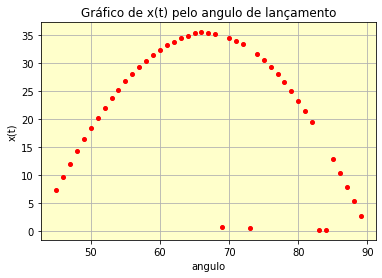

O ângulo que gera maior distância percorrida pelo foguete é 66 graus


In [8]:
# voltando para os padrões utilizados
# massa seca
mS = 0.3
# massa de água para propulsão:
mP = 0.66
# massa inicial do foguete:
M = mS + mP
# pressão inicial:
p0 = 517107

# lista de angulos de lançamento:
lista_angulos = np.arange(45,90,1)
lista_x_max = []
for angulo in lista_angulos:
    teta = math.radians(angulo)
    X2 = odeint(modelo2,X_0,lista_tempo,args=(teta,))
    lista_x2 = X2[:,0]
    lista_x_max.append(max(lista_x2))
    
ax=plt.axes()
plt.plot(lista_angulos,lista_x_max,'ro',markersize=4)
ax.set_facecolor('xkcd:ivory')
plt.title('Gráfico de x(t) pelo angulo de lançamento')
plt.ylabel('x(t)')
plt.xlabel('angulo')
plt.grid(True)
plt.show()

print('O ângulo que gera maior distância percorrida pelo foguete é {0} graus'.format(lista_angulos[lista_x_max.index(max(lista_x_max))]))

#### (4.2) Alcance pela massa de propulsão:

Rodando ODEINT variando o mP colocado no modelo, para poder responder qual a melhor massa de propulsão que gera o maior alcance do foguete. A resposta sairá no terminal depois do gráfico.

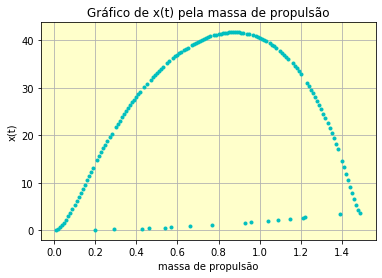

A massa de propulsão que gera maior distância percorrida pelo foguete é 0.88 kg


In [9]:
# melhor angulo de lançamento para alcance
angulo = 66


lista_massa_propulsao = np.arange(0.01,1.5,0.01)
lista_x_max_2 = []

for mP in lista_massa_propulsao:
    M = mS + mP
    m0 = M
    X_0=[x0,y0,vx0,vy0,m0]
    teta = math.radians(angulo)
    X2 = odeint(modelo2,X_0,lista_tempo,args=(teta,))
    lista_x2 = X2[:,0]
    lista_x_max_2.append(max(lista_x2))
    
ax=plt.axes()
plt.plot(lista_massa_propulsao,lista_x_max_2,'co',markersize=3)
ax.set_facecolor('xkcd:ivory')
plt.title('Gráfico de x(t) pela massa de propulsão')
plt.ylabel('x(t)')
plt.xlabel('massa de propulsão')
plt.grid(True)
plt.show()

print('A massa de propulsão que gera maior distância percorrida pelo foguete é {0} kg'.format(lista_massa_propulsao[lista_x_max_2.index(max(lista_x_max_2))]))

#### (4.2) Alcance pela massa seca:

Agora, com o angulo ideal e a massa de propulsão ideal, vamos descobrir qual a massa seca ideal para o lançamento do foguete, de modo a chegar o mais longe possível e ajudar a escola a ganhar a competição. Novamente a resposta sairá depois do gráfico.

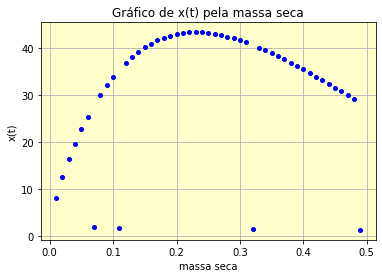

A massa seca que gera maior distância percorrida pelo foguete é 0.23 kg


In [11]:
# melhor massa de propulsão para o foguete:
mP = 0.88

lista_massa_seca = np.arange(0.01,0.5,0.01)
lista_x_max_3 = []

for mS in lista_massa_seca:
    M = mS + mP
    m0 = M
    X_0=[x0,y0,vx0,vy0,m0]
    teta = math.radians(angulo)
    X2 = odeint(modelo2,X_0,lista_tempo,args=(teta,))
    lista_x2 = X2[:,0]
    lista_x_max_3.append(max(lista_x2))
    
ax=plt.axes()
plt.plot(lista_massa_seca,lista_x_max_3,'bo',markersize=4)
ax.set_facecolor('xkcd:ivory')
plt.title('Gráfico de x(t) pela massa seca')
plt.ylabel('x(t)')
plt.xlabel('massa seca')
plt.grid(True)
plt.show()

print('A massa seca que gera maior distância percorrida pelo foguete é {0} kg'.format(lista_massa_seca[lista_x_max_3.index(max(lista_x_max_3))]))

### (5) Conclusão

Com os gráficos comclusivos podemos chegar na resposta perfeita para a escola:

- **Ângulo de lançamento**: 66 graus

- **Massa de propulsão**: 880 gramas de água

- **Massa seca**: 230 gramas

A pressão utilizada foi a máxima recomendada pelo manual de segurança de lançamento de foguetes de garrafa PET.